<a href="https://colab.research.google.com/github/JiSu0708/ESAA-YB/blob/main/0407_%EA%B3%BC%EC%A0%9C(ESAA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**두잇 데이터 분석을 위한 판다스 입문** 243-255p, 264-271p

## datetime 오브젝트로 변환하기 - to_datetime 메서드  
- **to_datetime**: 문자열 -> datetime  

### 문자열을 datetime 오브젝트로 변환하기

In [106]:
import pandas as pd
import os

ebola = pd.read_csv('country_timeseries.csv')

In [107]:
# Date 열이 문자열로 지정되었음을 알 수 있음.
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [108]:
# to_datetime 이용해 Date 열의 자료형을 datetime 오브젝트로 변환 -> 새로운 열로 추가
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [109]:
# to_datetime 메서드 - 시간 형식 지정자(%d, %m, %y)와 기호(/, -) 조합 -> format 인자에 전달
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [110]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


## 시간 형식 지정자  
- %a: 요일
- %A: 요일(긴 이름)
- %w: 요일(숫자, 0부터 일요일)
- %d: 날짜(2자리)
- %b: 월
- %B: 월(긴 이름)
- %m: 월(숫자)
- %y: 년(2자리)
- %Y: 년(4자리)
- %H: 시간(24시간)
- %I: 시간(12시간)
- %p: AM/PM
- %M: 분(2자리)
- %S: 초(2자리)
- %f: 마이크로초
- %z: UTC 차이(+HHMM/-HHMM 형태)
- %Z: 기준 지역 이름
- %j: 올해의 지난 일 수
- %U: 올해의 지난 주 수
- %c: 날짜와 시간
- %x: 날짜
- %X: 시간
- %G: 년(ISO 8601 형식)
- %u: 요일(ISO 8601 형식)
- %V: 올해의 지난 주 수(ISO 8601 형식)


### **strftime** 메서드 + 시간 형식 지정자   
시계열 데이터 잘라내기

In [111]:
now = pd.datetime.now()
print(now)

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2023-04-07 12:08:38.803779
2023-04-07
12:08:38
2023-04-07 12:08:38


<ipython-input-111-ac26e3c31d1f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  now = pd.datetime.now()


## datetime 오브젝트로 변환하기 - read_csv 메서드  
datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기  

### datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [112]:
# read_csv의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름 전달하여 데이터 집합 불러오기
ebola1 = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## datetime 오브젝트에서 날짜 정보 추출하기  

In [113]:
# 문자열로 저장된 날짜 -> 시리즈에 담아 -> datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [114]:
# datetime 오브젝트(d1)의 year, month, day 속성 이용 - 년, 월, 일 정보 바로 추출
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


### dt 접근자로 시계열 데이터 정리하기  
dt 접근자 사용 - datetime 속성/메서드 사용하여 시계열 데이터 처리  

### dt 접근자로 시계열 데이터 정리하기

In [115]:
# Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [116]:
# 인덱스가 3인 데이터의 년, 월, 일 데이터 추출(dt 접근자 사용X)
print(ebola[['Date', 'date_dt']].head())

print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [117]:
# dt 접근자 -> date_dt 열에 한 번에 접근 -> year 속성을 이용해 연도값 추출 -> 새로운 열(year) 추가
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [118]:
# 월, 일 데이터 한 번에 추출 -> 새로운 열(month, day) 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year','month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [119]:
# date_dt 열- 오브젝트, 나머지- 정수형
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 12-2. 사례별 시계열 데이터 계산하기  
### 에볼라 최초 발병일 계산하기

In [120]:
# ebola 데이터프레임 데이터- 시간 역순으로 정렬되어 있음 -> 시간 순으로 보려면 마지막부터 봐야 함.
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [121]:
# min 메서드 사용 -> 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [122]:
# Date 열 - 에볼라 최초 발병일 = 에볼라 진행 정도
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


### 파산한 은행의 개수 계산하기  
분기별로 파산한 은행이 얼마나 되는지 계산. 그래프로 시각화.

In [123]:
# Closing Date, Updated Date 열의 데이터 자료형 - 시계열 데이터임을 알 수 있음.
banks = pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [124]:
# Closing Date, Updated Date 열의 데이터 자료형 - 문자열 
banks_no_dates = pd.read_csv('banklist.csv')
print(banks_no_dates.info())

# read_csv 메서드의 parse_dates 속성 이용해 datetime 오브젝트로 변환해 불러오기
banks = pd.read_csv('banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null 

In [125]:
# dt 접근자, quarter 속성 이용 - 은행이 파산한 분기 알아내기
# dt 접근자, year, quarter 속성 이용 -> 은행이 파산한 연도, 분기 새로운 열로 추가
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [126]:
# 연도별로 파산한 은행 개수 구하기- groupby 메서드 이용
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [127]:
# 각 연도별, 분기별 파산한 은행 개수 구하기- 연도별 그룹화 후 다시 분기별 그룹화
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

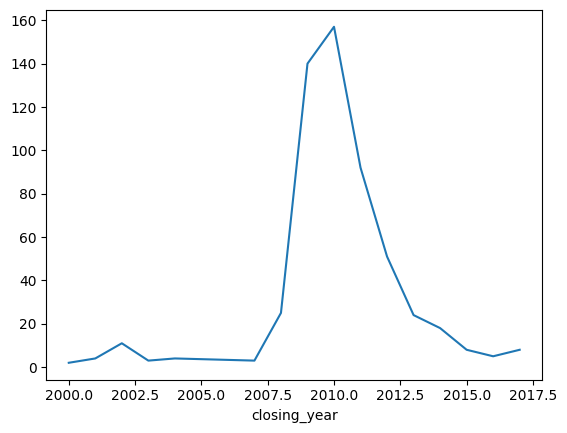

In [128]:
# 그래프 그리기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot()

## 시간 범위 수정하고 데이터 밀어내기- shift 메서드  

### 에볼라의 확산 속도 비교하기

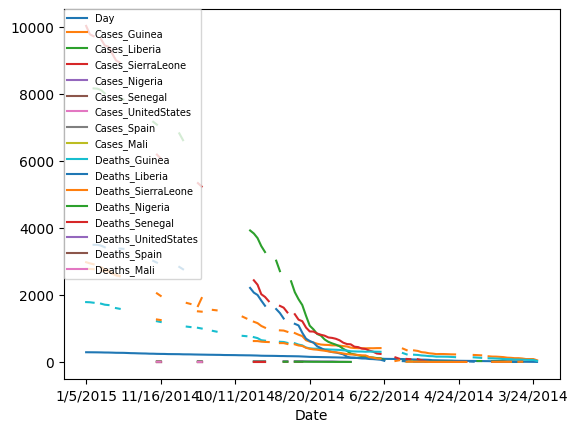

In [129]:
# Date 열 인덱스로 지정
ebola = pd.read_csv('country_timeseries.csv')
ebola.index = ebola['Date']

# x축: Date 열, y축: 사망자 수
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7,loc=2, borderaxespad=0)
plt.show()

In [130]:
# 각 나라의 에볼라 발병일이 달라 그래프가 그려지는 시작점이 다름을 알 수 있음.
# 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있다.

ebola_sub = ebola[['Day', 'Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


In [131]:
# Date 열의 자료형 datetime 오브젝트로 변환
ebola = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])

# 중간에 날짜가 없는 데이터(2015-01-01)가 있음 발견
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [132]:
# Date 열 인덱스로 지정
ebola.index = ebola['Date']

# Date 열의 최댓값과 최솟값으로 시간 범위 생성 -> new_idx에 저장 -> 날짜가 아예 없었던 데이터의 인덱스 생성
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [133]:
# new_idx를 보면 시간 순서가 반대로 생성되어 있음.
print(new_idx)

# 시간 순서를 맞추기 위해 reversed 메서드 사용 -> 인덱스 반대로 뒤집기
new_idx = reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [134]:
# reindex 메서드 사용- 새로 생성한 인덱스(new_idx)를 새로운 인덱스로 지정 
ebola = ebola.reindex(new_idx)

# -> ebola 데이터프레임에 아예 없었던 날짜가 이제 추가됨
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

# 시간에 대한 누락값은 NaT

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [135]:
# 각 나라의 에볼라 발병일 구하기
# last_valid: 가장 오래된 데이터, first_valid: 가장 최근의 데이터

last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [136]:
# 각 나라의 에볼라 발병일 동일한 출발선으로 옮기기- shift_values 만큼 옮기기
earliest_date = ebola.index.min()
print(earliest_date)

# shift_values = 가장 처음 발병한 날(earliest_date) - 각 나라의 에볼라 발병일
shift_values = last_valid - first_valid
print(shift_values)

2014-03-22 00:00:00
Date                  -289 days
Day                   -289 days
Cases_Guinea          -289 days
Cases_Liberia         -282 days
Cases_SierraLeone     -284 days
Cases_Nigeria         -137 days
Cases_Senegal          -98 days
Cases_UnitedStates     -67 days
Cases_Spain            -60 days
Cases_Mali             -46 days
Deaths_Guinea         -289 days
Deaths_Liberia        -282 days
Deaths_SierraLeone    -284 days
Deaths_Nigeria        -137 days
Deaths_Senegal         -91 days
Deaths_UnitedStates    -67 days
Deaths_Spain           -60 days
Deaths_Mali            -46 days
dtype: timedelta64[ns]


In [137]:
# shift 메서드 사용 -> 모든 열의 값 shift_values 값만큼 옮기기
# shift: 인자값만큼 데이터를 밀어내는 메서드
ebola_dict = {}

for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

In [138]:
# ebola_dict: 시간을 재설정한 데이터가 딕셔너리 형태로 저장되어 있음 -> 데이터프레임으로 변환(DataFrame 메서드 이용)
ebola_shift = pd.DataFrame(ebola_dict)

In [139]:
# 이제 최초 발병일(2014-03-22) 기준으로 모든 열의 데이터 옮겨짐.
print(ebola_shift.tail())

           Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                   
2014-03-26  NaT  NaN           NaN            NaN                NaN   
2014-03-25  NaT  NaN           NaN            NaN                NaN   
2014-03-24  NaT  NaN           NaN            NaN                NaN   
2014-03-23  NaT  NaN           NaN            NaN                NaN   
2014-03-22  NaT  NaN           NaN            NaN                NaN   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            NaN            NaN                 NaN          NaN   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN          NaN   
2014-03-22            NaN        

In [140]:
# 그래프를 그리기 위한 데이터프레임 만들기
# 인덱스 Day 열로 지정
# 그래프에 필요 없는 Date, Day 열 삭제

ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis = 1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   
NaN           NaN            NaN                NaN            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   

     Deaths_Guinea  Deaths_Liberia  Dea

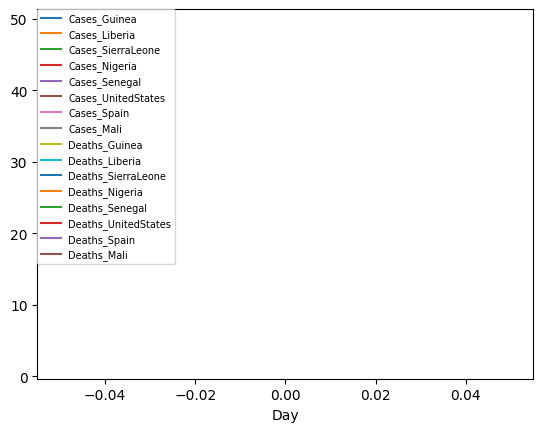

In [141]:
# 그래프 그리기
# x축이 Day로 변경됨
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0)
plt.show()

**마무리**  
- 판다스 라이브러리- 시간을 다룰 수 있는 다양한 기능 제공
- 시계열 데이터와 깊은 연관성 있는 에볼라 데이터, 주식 데이터를 다루어 봄.
- 우리 주변의 상당수 데이터는 시간과 깊은 연관성이 있는 경우가 많음.
- 시계열 데이터를 능숙하게 다루는 것은 데이터 분석가의 기본 소양!